All used libraries are show imported in the following code block.

In [95]:
import scipy.stats as stats
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import geopandas as gpd
import seaborn as sns
import math

import matplotlib.pyplot as plt


In [104]:
data = pd.read_csv('cleaned_data/cleaned.csv')
data.head()

,source_airline_country,source_airport_ID,source_airport_name,source_airport_city,source_airport_country,source_airport_lat,source_airport_long,source_airport_alt,destination_airport_ID,destination_airport_name,...,destination_airport_alt,airline_ID,airline_name,route_stops,IATA Code,icao_code,aircraft_name,aircraft_general_make,aircraft_company,airbus_boeing_other
0,Portugal,2965.0,Sochi International Airport,Sochi,Russia,43.449902,39.956600,89.0,2990.0,Kazan International Airport,...,411.0,410,Aerocondor,0,CR2,CRJ2,Canadair Regional Jet 200,CRJ2,Canadair,Other
1,Portugal,2966.0,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,-65.0,2990.0,Kazan International Airport,...,411.0,410,Aerocondor,0,CR2,CRJ2,Canadair Regional Jet 200,CRJ2,Canadair,Other
2,Portugal,2966.0,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,-65.0,2962.0,Mineralnyye Vody Airport,...,1054.0,410,Aerocondor,0,CR2,CRJ2,Canadair Regional Jet 200,CRJ2,Canadair,Other
3,Portugal,2968.0,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,769.0,2990.0,Kazan International Airport,...,411.0,410,Aerocondor,0,CR2,CRJ2,Canadair Regional Jet 200,CRJ2,Canadair,Other
4,Portugal,2968.0,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,769.0,4078.0,Tolmachevo Airport,...,365.0,410,Aerocondor,0,CR2,CRJ2,Canadair Regional Jet 200,CRJ2,Canadair,Other


Below are some useful definitions that will be used later in the analysis of the data.

In [97]:

def t_test(group1, group2):
    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(group1, group2)

    # Print the results
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

    return(t_statistic, p_value)



def linear_regression(data, features, target):
    X = data[features]
    y = data[target]

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(X, y)

    # Get coefficients, intercept, and R-squared
    coefficients = model.coef_
    intercept = model.intercept_
    r_squared = model.score(X, y)

    # Print the results
    print("Coefficients", coefficients)
    print("Intercept", intercept)
    print("R-Squared", r_squared)

    return coefficients, intercept, r_squared

def logistic_regression(dataset, features, target, test_size=0.2, random_state=42): # Note random state will always be set to 42 in our analysis
    # Load and prepare data
    X = data[features]
    y = data[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create a logistic regression model
    model = LogisticRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    confusion = confusion_matrix(y_test, y_pred)

    # Print the results
    print("Confusion Matrix", confusion)

    return confusion

Below are some definitions for basic visuals that can be used.

In [107]:
def stacked_bar_chart(data, title=None, xlabel=None, ylabel=None, legend_labels=None):

    # Create figure and axis
    fig, ax = plt.subplots()

    data.plot(kind='bar', stacked=True, ax=ax)

    # Add title, label, legend
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if legend_labels:
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    return fig

def histogram(data, bins=10, color='blue', title=None, xlabel=None, ylabel=None):
    # Create figure and axis
    fig, ax = plt.subplots()

    # Plot the histogram
    ax.hist(data, bins=bins, color=color)

    # Add title and labels
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

    return fig

def create_scatterplot(x, y, color='blue', title=None, xlabel=None, ylabel=None):
    # Create figure and axis
    fig, ax = plt.subplots()

    # Plot the scatterplot
    ax.scatter(x, y, color=color)

    # Add title and label
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

    return fig

def create_colored_world_map(data, country_col, company_col, title="World Map Colored by Most Used Aircraft Company"):

    # Create a GeoDataFrame with country geometries
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge the GeoDataFrame with the data
    world = world.merge(data, left_on='name', right_on=country_col)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(15, 10))

    # Plot the world map boundaries
    world.boundary.plot(ax=ax, linewidth=1, color='k')

    # Use a default color palette (e.g., Seaborn palette) to assign colors
    palette = sns.color_palette("Set3", n_colors=len(world[company_col].unique()))

    # Color the countries based on the most used aircraft company
    for i, company in enumerate(world[company_col].unique()):
        world[world[company_col] == company].plot(ax=ax, color=palette[i], label=company, legend=True)

    # Customize the legend
    ax.legend(title='Aircraft Company', loc='lower right')

    # Set the title
    ax.set_title(title)

    return fig

In [108]:
# Function to calculate distance using Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    # Radius of the Earth in kilometers
    radius = 6371 
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = radius * c
    
    return distance

data['distance'] = data.apply(lambda row: haversine_distance(row['source_airport_lat'], 
                                                             row['source_airport_long'], 
                                                             row['destination_airport_lat'], 
                                                             row['destination_airport_long']), axis=1)

In [109]:
data['route'] = data['source_airport_name'] + " to " + data['destination_airport_name']

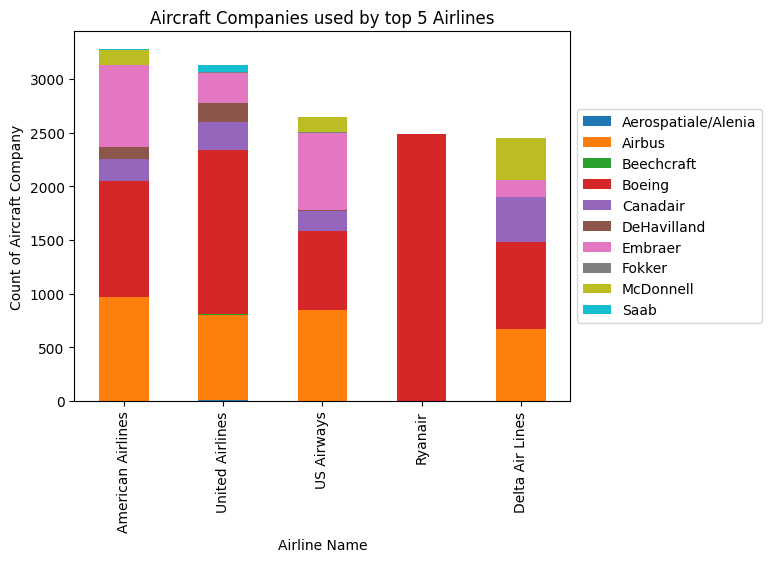

In [110]:
# Pivot the DataFrame to get counts of 'make' per 'airline'
pivot_df = data.pivot_table(index='airline_name', columns='aircraft_company', aggfunc='size', fill_value=0)
# Calculate the total count of routes for each airline
pivot_df['Total'] = pivot_df.sum(axis=1)

# Sort the DataFrame by the total count in descending order
pivot_df = pivot_df.sort_values(by='Total', ascending=False)
pivot_df = pivot_df.head(5)
pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]

fig = stacked_bar_chart(pivot_df.drop(columns='Total'), xlabel='Airline Name', ylabel='Count of Aircraft Company', 
                        title='Aircraft Companies used by top 5 Airlines', legend_labels='Aircraft Company')
plt.show()

aircraft_company source_airport_country  Aerospatiale/Alenia  Airbus  Antonov  \
0                           Afghanistan                    2      17        0   
1                               Albania                    0      25        0   
2                               Algeria                   75      62        0   
3                        American Samoa                    0       0        0   
4                                Angola                    5      12        0   
..                                  ...                  ...     ...      ...   
220                   Wallis and Futuna                    0       2        0   
221                      Western Sahara                    3       0        0   
222                               Yemen                    0      79        0   
223                              Zambia                    1      10        0   
224                            Zimbabwe                    1       9        0   

aircraft_company  Avro  BAe

C:\Users\nicoesse\AppData\Local\Temp\ipykernel_10800\3850519.py:57: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\nicoesse\AppData\Local\Temp\ipykernel_10800\3850519.py:76: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(title='Aircraft Company', loc='lower right')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


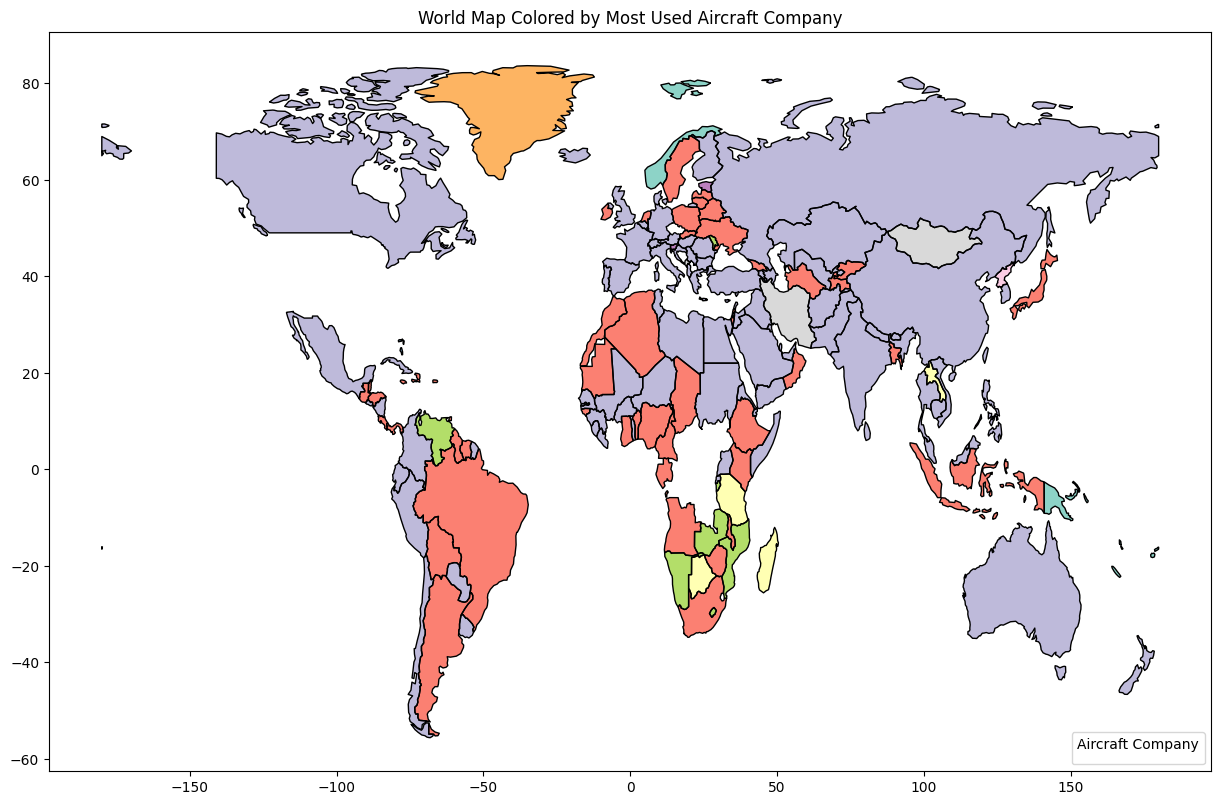

In [115]:
pivot_df = data.pivot_table(index='source_airport_country', columns='aircraft_company', aggfunc='size', fill_value=0)
pivot_df['MostUsedCompany'] = pivot_df.idxmax(axis=1)
pivot_df = pivot_df.reset_index()
print(pivot_df)

create_colored_world_map(pivot_df, country_col='source_airport_country', company_col='MostUsedCompany')
plt.show()